# U.S. Medical Insurance Costs
This is my US Medical Insurance Costs portfolio project, as part of the Codecademy Data Science learning program. This project utilises Python 3 to investigate a sample dataset representing insurance details. Firstly the dataset will be imported and its qualities assessed.

In [1]:
#import csv file and print first two lines of our insurance document
import csv
with open("insurance.csv") as insurance_details:
    print(insurance_details.readline())
    print(insurance_details.readline())

age,sex,bmi,children,smoker,region,charges

19,female,27.9,0,yes,southwest,16884.924



Now we know how our dataset is categorised, with one example given to us for reference. We can start to arrange our data.

In [2]:
#Empty lists to be populated after importing our data
ages = []
sexes = []
bmis = []
num_of_children = []
smoker_status = []
regions = []
charges = []

In [3]:
#Open the insurance document and populate the lists with appropriate data. Convert numerical data from strings to floats / integers.
with open("insurance.csv", newline = '') as insurance_details_doc:
    insurance_details = csv.DictReader(insurance_details_doc)
    for file in insurance_details:
        ages.append(int(file['age']))
        sexes.append(file['sex'])
        bmis.append(float(file['bmi']))
        num_of_children.append(int(file['children']))
        smoker_status.append(file['smoker'])
        regions.append(file['region'])
        charges.append(float(file['charges']))

Now that we have the lists in order we can find some key statistics to understand the demographic better. 

We want to know the averages of our quantitative data: age, bmi and number of children.


In [4]:
#Define a function to produce our mean values
def find_average(lst):
    return(sum(lst)/len(lst))
#Apply function to age, bmi and number of children   
print("There are " + str(len(ages)) + " files on record.")
print("The average age per file is " + str(find_average(ages)))
print("The average BMI per file is " + str(find_average(bmis)))
print("The average number of children per file is " + str(find_average(num_of_children)))
print("The average charge per file is " + str(find_average(charges)))

There are 1338 files on record.
The average age per file is 39.20702541106129
The average BMI per file is 30.663396860986538
The average number of children per file is 1.0949177877429
The average charge per file is 13270.422265141257


In [5]:
def find_percentage(item,lst):
    return(100*lst.count(item)/len(lst))

In [6]:
print("The percentage of males in our sample is " + str(find_percentage('male',sexes)) + "%.")
print("The percentage of smokers in our sample is " + str(find_percentage('yes',smoker_status)) + "%.")

The percentage of males in our sample is 50.52316890881913%.
The percentage of smokers in our sample is 20.47832585949178%.


Now we know a little more, our male / female ratio is fairly evenly split. Smokers make up approximately 20% of the sample population. Time to rearrange the data for more suitable analysis. Namely making qualitative data binary. We are interested in rearranging the 'sexes', 'smoker_status' and 'regions' lists as a result. Sexes and smoker_status will become binary, regions will be split into categories that allow binary distribution. Let's arrange sexes and smoker status first:
 - sexes: male = 1; female = 0
 - smoker: yes = 1; no = 0

In [7]:
#New empty lists for binary data to be populated into
new_sexes = []
new_smoker_status = []
#Loops to arrange binary data based on values
for sex in sexes:
    if sex == 'male':
        new_sexes.append(1)
    if sex == 'female':
        new_sexes.append(0)
        
for smoker in smoker_status:
    if smoker == 'yes':
        new_smoker_status.append(1)
    if smoker == 'no':
        new_smoker_status.append(0)

smoker_status = new_smoker_status
sexes = new_sexes

Now for our regions. These will be split into north, south, east and west with binary data. Yes = 1; No = 0.

In [8]:
north = []
south = []
east = []
west = []
for region in regions:
    if 'south' in region:
        south.append(1)
    else:
        south.append(0)
    if 'north' in region:
        north.append(1)
    else:
        north.append(0)
    if 'east' in region:
        east.append(1)
    else:
        east.append(0)
    if 'west' in region:
        west.append(1)
    else:
        west.append(0)

In [9]:
print("In our sample population, " + str(north.count(1)) + " live in the north, " + str(west.count(1)) + " live in the west, " + str(south.count(1)) + " live in the south, " + str(east.count(1)) + " live in the east.")

In our sample population, 649 live in the north, 650 live in the west, 689 live in the south, 688 live in the east.


Management wants to know a little more on how the age groups are split and wants to know each year group in bands of 10 yrs, starting with 20 inclusive up until 60 (but including a wider category of below 20 and above 60)

In [10]:
below_20 = 0
twenty_to_thirty = 0
thirty_to_fourty = 0
fourty_to_fifty = 0
fifty_to_sixty = 0
above_60 = 0
for age in ages:
    if age >= 60:
        above_60 += 1
    elif age >= 50:
        fifty_to_sixty += 1
    elif age >= 40:
        fourty_to_fifty += 1
    elif age >= 30:
        thirty_to_fourty += 1
    elif age >= 20:
        twenty_to_thirty += 1
    else:
        below_20 += 1

In [11]:
print(
"Below 20: " + str(below_20) + "\n"
"20-30: " + str(twenty_to_thirty) + "\n"
"30-40: " + str(thirty_to_fourty) + "\n"
"40-50: " + str(fourty_to_fifty) + "\n"
"50-60: " + str(fifty_to_sixty) + "\n"
"Above 60: " + str(above_60))

Below 20: 137
20-30: 280
30-40: 257
40-50: 279
50-60: 271
Above 60: 114


In [12]:
import matplotlib.pyplot as plt

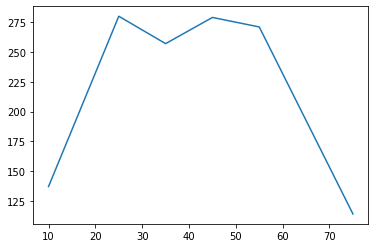

In [13]:
plt.plot([10,25,35,45,55,75],[137,280,257,279,271,114])

Recent retention data suggests that an increasing number of 30-40 year olds have been discontinuing their payments as indicated by the small dip in numbers above, with the main reason given being the high prices. We have decided to give non-smokers below 40 a 5% discount, and smokers below 40 a 2% discount and amend the charges list appropriately

In [14]:
for i in range(len(ages)):
    if ages[i] < 40:
        if smoker_status[i] == 0:
            charges[i] = 0.95*charges[i]
        else:
            charges[i] = 0.98*charges[i]

In [15]:
import random

Now we want to create another variable for our customers - fitness. This is the average weekly minutes that the customer has been exercising, and we want to apply a discount that is proportional to this value, with max value of 300. First we will create the list for fitness levels, for the purpose of this project this is a randomly generated list.

In [16]:
fitness = []
for i in range(len(charges)):
    n = random.randint(0,300)
    fitness.append(n)

In [17]:
for i in range(len(charges)):
    charges[i] = int(charges[i] - (fitness[i]/3))

In [23]:
rows = zip(ages,sexes,bmis,num_of_children,smoker_status,fitness,north,south,east,west,charges)
with open("new_insurance.csv", "w", newline = "") as insurance_details:
    writer = csv.writer(insurance_details)
    writer.writerow(["Age", "Sex", "BMI", "Children", "Smoker", "Fitness", "North", "South", "East", "West", "Charges"])
    for row in rows:
        writer.writerow(row)

In [24]:
with open("new_insurance.csv") as insurance_details:
    print(insurance_details.readline())
    print(insurance_details.readline())

Age,Sex,BMI,Children,Smoker,Fitness,North,South,East,West,Charges

19,0,27.9,0,1,208,0,1,0,1,16477



Adjusted charges are now saved in a new file, discounts have been applied